<a href="https://colab.research.google.com/github/Diogo364/-quarentenadados/blob/master/QuarentenaDados_aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 01 - QuarentenaDados

## Introdução
----

Esse notebook é referente à resolução dos desafios da **Aula 01** da **#quarentenadados**.

## Lendo os dados do MovieLens


### Importando Base de Filmes

In [0]:
import pandas as pd

In [78]:
filmes = pd.read_csv("https://raw.githubusercontent.com/Diogo364/-quarentenadados/master/data_set/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Importando a base de Avaliação dos filmes

In [79]:
avaliacoes = pd.read_csv("https://github.com/Diogo364/-quarentenadados/blob/master/data_set/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


#### Resolução:

Primeiramente iremos agrupar as notas dos filmes por id e iremos utilizar a operação `mean` para sumarizá-los.

In [0]:
mediaFilmes = avaliacoes[['filmeId', 'nota']].groupby('filmeId').agg('mean')

In [81]:
mediaFilmes.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


Em seguida iremos dar o merge entre o DataFrame agrupado de médias com o DataFrame com informações dos filmes para termos o nome dos filmes e a nota média em um mesmo DataFrame.

Obs: Importante ressaltar que o id do filme se encontra no index do agrupamento feito nas linhas acima, portanto teremos que utilizar o parâmetro `right_index=True`

Obs2: Como podemos ter filmes que não tenham nota, ou seja, que não estejam presentes na tabela de notas, temos que utilizar o parâmetro `how='left'`, pois por padrão ele utiliza `how='inner'`, mostrando apenas registros que estejam presentes nas duas tabelas.

In [0]:
filmesComMedia = filmes[['filmeId', 'titulo']].merge(mediaFilmes, left_on='filmeId', right_index=True, how='left')

Por fim pedimos para que ele mostre todos os filmes que não tiveram notas registradas, ou seja, que tenham como conteúdo de `nota = NaN`

In [83]:
filmesComMedia.loc[filmesComMedia.nota.isna()]

,filmeId,titulo,nota
816,1076,"Innocents, The (1961)",NaN
2211,2939,Niagara (1953),NaN
2499,3338,For All Mankind (1989),NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",NaN
3118,4194,I Know Where I'm Going! (1945),NaN
4037,5721,"Chosen, The (1981)",NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",NaN
4598,6849,Scrooge (1970),NaN
4704,7020,Proof (1991),NaN
5020,7792,"Parallax View, The (1974)",NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [84]:
filmesComMedia.head()

,filmeId,titulo,nota
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429


Para resolver esse problema utilizaremos o método rename, passando um dicionário como primeiro parâmetro contendo:

`{'nome_atual': 'nome_desejado}`

Em seguida temos que utilizar o parâmetro `axis=1`, pois por padrão esse método utiliza `axis=0`, renomeando o `index` e não a coluna.

O uso de `inplace=True` serve apenas para não gerar um novo DataFrame, mas sim atualizar o próprio DataFrame utilizado.

In [0]:
filmesComMedia.rename({'nota':'nota_media'}, axis=1, inplace=True)

In [86]:
filmesComMedia.head()

,filmeId,titulo,nota_media
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

Nesse desafio utilizei o método `value_counts` que simplesmente conta o número de vezes que algum elemento aparece em uma série.

Importante ressaltar que o retorno desse método é uma `Serie` onde o `index` é a váriavel que foi contada e o `value` é o número de vezes que ela aparece.

In [87]:
numeroAvaliacoes = avaliacoes['filmeId'].value_counts()
numeroAvaliacoes.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

Agora faremos o merge, bem semelhante ao que tínhamos feito no **Desafio 1**, entre o nosso DataFrame de filmes com médias e a nossa Serie com o número de vezes que cada ID apareceu.

Repare que estamos utilizando um DataFrame com todos os registros de filmes para o merge com um DataFrame contendo apenas os votos de cada file, como já sabemos que temos filmes que não foram votados, é interessante utilizarmos o parâmerto `how='left'` para esse merge também.

Obs: Quando utitlizamos uma serie para fazer o merge com o DataFrame temos que ficar atentos aos nomes das colunas, pois o nome da coluna nova adicionada ao DataFrame é o nome da Série.

In [88]:
filmesVotosMedia = filmesComMedia.merge(numeroAvaliacoes, left_on='filmeId', right_index=True, how='left')
filmesVotosMedia.rename({'filmeId_y': 'votos', 'filmeId_x':'filmeId'}, axis=1, inplace=True)
filmesVotosMedia.head()

,filmeId,titulo,nota_media,votos
0,1,Toy Story (1995),3.920930,215.0
1,2,Jumanji (1995),3.431818,110.0
2,3,Grumpier Old Men (1995),3.259615,52.0
3,4,Waiting to Exhale (1995),2.357143,7.0
4,5,Father of the Bride Part II (1995),3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

Para isso existe um método chamado `round`, onde você passa por parâmetro o número de casas decimais que você deseja.

In [89]:
filmesVotosMedia = filmesVotosMedia.round(decimals=2)
filmesVotosMedia.head()

,filmeId,titulo,nota_media,votos
0,1,Toy Story (1995),3.92,215.0
1,2,Jumanji (1995),3.43,110.0
2,3,Grumpier Old Men (1995),3.26,52.0
3,4,Waiting to Exhale (1995),2.36,7.0
4,5,Father of the Bride Part II (1995),3.07,49.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

### Primeiro teremos que trabalhar com o padrão de string da coluna `'generos'`:<br>
`'genero1|genero2|genero3'`

In [90]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Iremos iterar cada linha do DataFrame e separar o genero em uma lista.

Depois iremos adicionar o id do filme com um dos generos em outro DataFrame, gerando como resultado um DataFrame em que cada registro possui a relação de um filme com um `genero`.

In [0]:
# separacaoGeneros = pd.DataFrame(columns=['filmeId', 'genero'])
# for indx, row in filmes.iterrows():
#   listaGeneros = row.generos.split('|')
#   for genero in listaGeneros:
#     separacaoGeneros = separacaoGeneros.append({'filmeId': row.filmeId, 'genero': genero}, ignore_index=True)
# separacaoGeneros.head() 

### Generos únicos de filmes

Para esse momento utilizaremos o DataFrame que nós montamos, filtrando uma coluna juntamente com o método `unique` que retorna uma lista com todos os valores únicos para determinada coluna.

In [0]:
# separacaoGeneros.genero.unique()

#### Metodologia utilizada no gabarito:
---
A utilização do método `str.get_dummies` realiza a separação das strings utilizando um separador, que por padrão `sep='|'`, retornando um DataFrame onde cada registro marca a presença ou ausência de uma coluna na string separada.

In [93]:
separacaoSimplificadaGeneros = filmes.generos.str.get_dummies()
separacaoSimplificadaGeneros.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dessa forma, cada gênero único se torna uma coluna no DataFrame de retorno.

In [94]:
separacaoSimplificadaGeneros.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

Para esse Desafio a utilização do método `value_counts` na coluna `generos` é suficiente.

In [0]:
# separacaoGeneros.genero.value_counts()

#### Metodologia utilizada no gabarito:
---
Com a abordagem do gabarito podemos apenas somar todas as colunas para obter o número de registro para cada genero.

In [96]:
compilacaoGeneros = separacaoSimplificadaGeneros.sum().sort_values(ascending=False)
compilacaoGeneros.head()

Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

O `matplotlib` é uma das bibliotecas mais utilizadas para o plot de gráficos, porém demanda um controle a nível muito baixo de todas as variáveis, sendo assim preferi utilizar a biblioteca `seaborn`, que utiliza como base o `matplotlib`, mas permite um controle mais símples de alguns parâmetros.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Para deixar os plots com um tamanho e contraste melhor utilizarei o `style:'darkgrid'` e aumenterei o tamanho da figura.

In [0]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=18,12

Para gerar um Histograma utilizando variáveis categoricas usando o seaborn temos que utilizar o método `countplot`, onde o primeiro parâmetro é a variável de interesse.

Para esse caso, como se trata de uma variável categórica sem ordem definida - genero de filme não tem ordem - preferi deixar as barras em ordem decrescente, por isso utilizei o parâmetro `order`, que recebe uma lista com a ordem das variáveis categóricas. Utilizei o método `value_counts` pois ele retorna uma série ordenada descendente de aparição de elementos, contendo o nome do elemento no `index`.

In [0]:
# sns.countplot(separacaoGeneros.genero, order=separacaoGeneros.genero.value_counts().index)

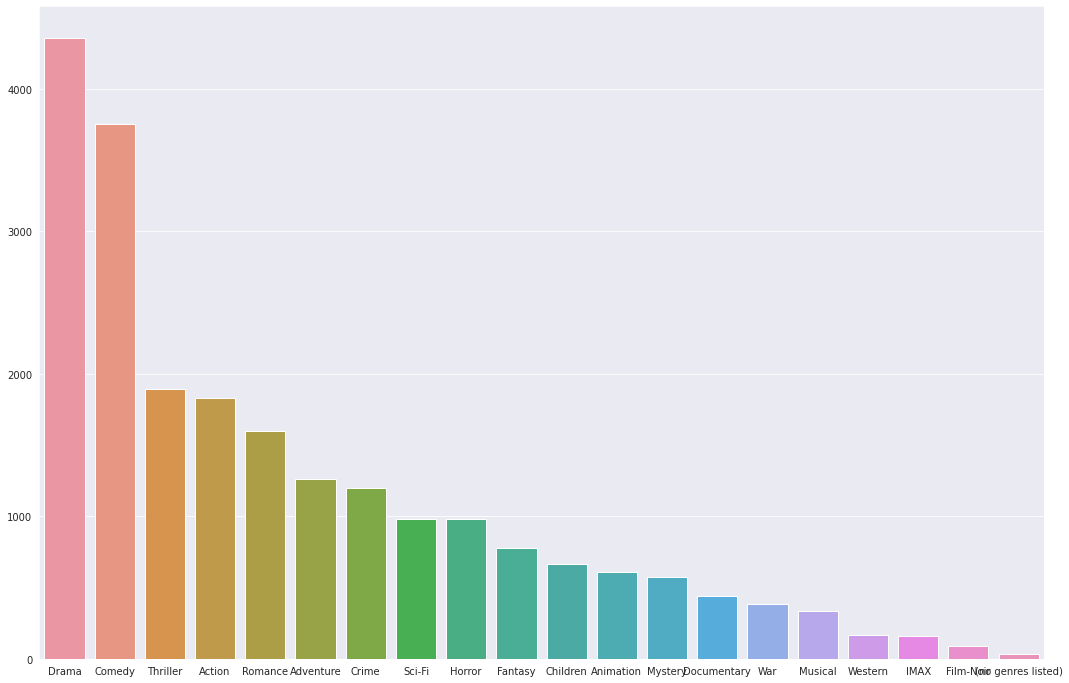

In [100]:
sns.barplot(x=compilacaoGeneros.index, y=compilacaoGeneros.values)

# Aula 02 - Quarentena Dados
---

O código da **Aula 01** está ocultado dentro desse notebook, já que existe dependência dos códigos das duas aulas.

<b>Obs:</b> Importante ressaltar que para melhora no desempenho, algumas linhas do código da **Aula 01** foram comentadas.

## Antes de iniciar os desafios...

Gostaria de aproveitar para mudar a paletta de cores do gráfico de distribuição dos generos dos filmes.

Por estarmos tratando de quantidades de elementos, podemos utilizar a paletta de cores a nosso favor, trazendo informações extras e funcionando como uma outra dimensão.

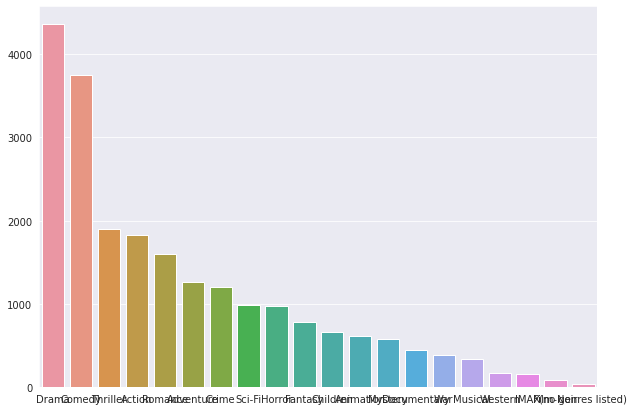

In [101]:
# Paletta antiga
plt.rcParams['figure.figsize']=10, 7
sns.barplot(x=compilacaoGeneros.index, y=compilacaoGeneros.values)

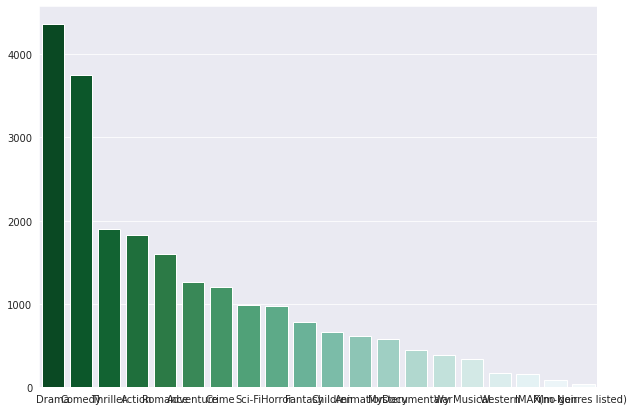

In [102]:
# Nova paletta
paleta_degrade = sns.color_palette("BuGn_r", n_colors=len(compilacaoGeneros))
sns.barplot(x=compilacaoGeneros.index, y=compilacaoGeneros.values, palette=paleta_degrade)

Dessa forma o gráfico fica mais confortável aos olhos e também acaba trazendo a ideia de que uma concentração mais forte de verde representa maior presença.

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

Para tentar deixar o gráfico com a legenda mais legível eu aumentei sua largura, mas existem formas mais elegantes de fazê-lo.

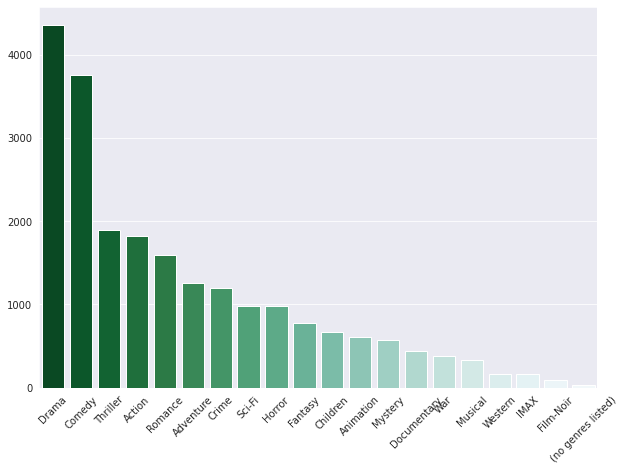

In [103]:
sns.barplot(x=compilacaoGeneros.index, y=compilacaoGeneros.values, palette=paleta_degrade)
plt.xticks(rotation=45)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

In [0]:
def plot_filmes(data_frame_filtrado_filme):
  print(f'''
  Id Filme: {data_frame_filtrado_filme.filmeId.unique()}
  media: {data_frame_filtrado_filme.nota.mean()}
  ''')
  sns.countplot(data_frame_filtrado_filme.nota, color='blue')
  plt.show()

Para realizar essa comparação irei utilizar de alguns métodos para facilitar minha busca:

- Escolher filmes com uma quantidade alta de avaliações
- Procurar filmes que possuam a nota média próxima da média das notas médias
- Utilizarei a medida de meio desvio padrão para procurar os filmes

In [0]:
mediaMediaNotas = filmesVotosMedia.nota_media.mean()
meioSTD = filmesVotosMedia.nota_media.std()/2
limiteSuperior = mediaMediaNotas + meioSTD
limieteInferior = mediaMediaNotas - meioSTD

Após ser feita a consulta e ordernar os valores, escolherei os dois filmes que estão no meio.

In [150]:
resultadoConsulta = filmesVotosMedia[(filmesVotosMedia.nota_media > limieteInferior) & 
                                     (filmesVotosMedia.nota_media < limiteSuperior) & 
                                     (filmesVotosMedia.votos > 100)].sort_values(by='nota_media')
metadeResultado = int(len(resultadoConsulta.index)/2)                                     
filmes_selecionados = resultadoConsulta.iloc[metadeResultado: metadeResultado+2]                                    
filmes_selecionados

,filmeId,titulo,nota_media,votos
615,780,Independence Day (a.k.a. ID4) (1996),3.45,202.0
217,253,Interview with the Vampire: The Vampire Chroni...,3.46,109.0



  Id Filme: [780]
  media: 3.4455445544554455
  


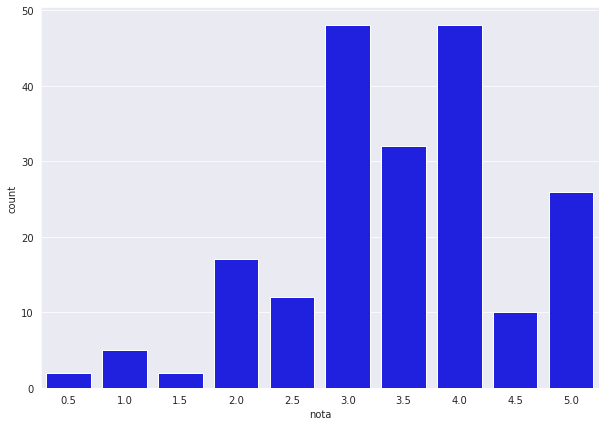

In [151]:
plot_filmes(avaliacoes.loc[avaliacoes.filmeId == 780])


  Id Filme: [253]
  media: 3.458715596330275
  


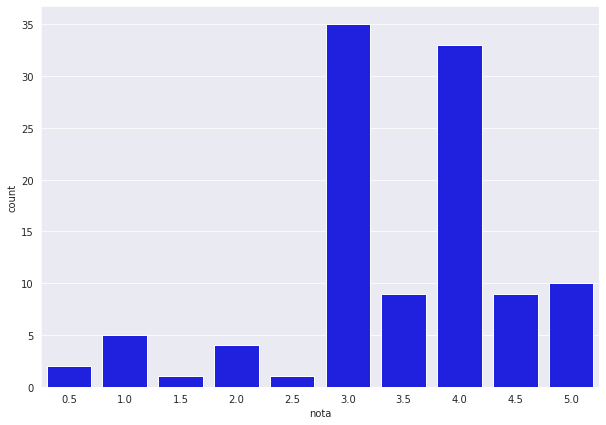

In [152]:
plot_filmes(avaliacoes.loc[avaliacoes.filmeId == 253])

Embora ambas as médias sejam muito parecidas a distribuição das notas é bem diferente entre os dois filmes.
- Independence Day: Embora tenha um peso grande nas avaliações 3.0 e 4.0 a as outras avaliações aliviam um pouco, possuindo grande quantidade de avaliações 3.5 e um número relevante de avaliações 5.0

- Entrevista com Vampiro: Existe um peso muito grande nas avaliações 3.0 e 4.0, as outras avaliações acabam sendo pouco relevantes.


## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

Para essa tarefa achei mais simples utilizar o DataFrame que construímos `filmesVotosMedia`, visto que esse já possui no número total de votos de cada filme, junto do `Id` do filme.

- Primeiramente ordenamos o DataFrame em ordem decrescente de votos.

- Depois atribuímos os 10 elementos do topo à nossa variável `filmesMaisVotados`

In [178]:
# Lista dos filmes mais Votados
votosOrdenadosDecrescente = filmesVotosMedia.sort_values(by='votos', ascending=False)
filmesMaisVotados = votosOrdenadosDecrescente.head(10)
filmesMaisVotados

,filmeId,titulo,nota_media,votos
314,356,Forrest Gump (1994),4.16,329.0
277,318,"Shawshank Redemption, The (1994)",4.43,317.0
257,296,Pulp Fiction (1994),4.20,307.0
510,593,"Silence of the Lambs, The (1991)",4.16,279.0
1939,2571,"Matrix, The (1999)",4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),4.23,251.0
418,480,Jurassic Park (1993),3.75,238.0
97,110,Braveheart (1995),4.03,237.0
507,589,Terminator 2: Judgment Day (1991),3.97,224.0
461,527,Schindler's List (1993),4.22,220.0


- Extraímos o `filmeId` desses filmes para conseguirmos separa-los dentro do registro de avaliações.
- Filtramos o DataFrame de avaliações para que apresente apenas os id's presentes na lista dos `idTopMaisVotados`
- Por fim mostramos o Boxplot


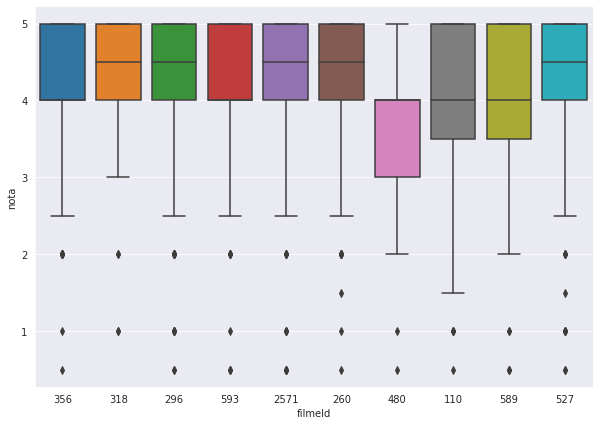

In [181]:
idTopMaisVotados = filmesMaisVotados.filmeId.values
avaliacoesDosTopVotados = avaliacoes[avaliacoes.filmeId.isin(idTopMaisVotados)]
sns.boxplot(data = avaliacoesDosTopVotados,
            x='filmeId',
            y='nota', 
            orient='vertical',
            order=idTopMaisVotados)
plt.show()

Um detalhe interessante do boxplot do Seaborn é que os limites inferior e superior de cada boxplot - o bigode de cada caixa - é uma estimativa baseada no cálculo da [Amplitude interquartil](https://pt.wikipedia.org/wiki/Amplitude_interquartil)

### Uma outra abordagem

---

Uma outra forma interessante de visualizar as distribuições usando o seaborn é pelo método `violinplot`, onde a grossura do contorno representa a quantidade de pontos naquela altura.

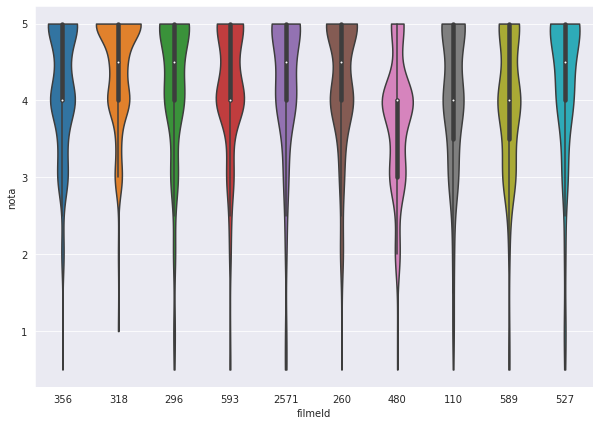

In [187]:
sns.violinplot(data = avaliacoesDosTopVotados,
            x='filmeId',
            y='nota', 
            orient='vertical',
            order=idTopMaisVotados,
            cut=0)
plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

Para realizar a alteração dos Ticks para o nome dos filmes é necessário realizar um merge entre o DataFrame dos melhores filmes e o DataFrame que contém a relação do nome e Id.

In [189]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Como queremos apenas o titulo, utilizaremos apenas as colunas necessárias durante o merge:
- Coluna identificadora para ligação: `'filmeId'`
- Coluna com o nome dos tilmes: `'titulo'`

Obs: Nesse caso o nome das colunas de ligação são os mesmos, portanto podemos passa-lo como parâmetro `on`

Obs2: Tome sempre cuidado com o tipo do merge, nesse caso estamos fazendo um left


In [190]:
topVotadosComNome = avaliacoesDosTopVotados.merge(filmes[['filmeId', 'titulo']], on='filmeId', how='left')
topVotadosComNome

,usuarioId,filmeId,nota,momento,titulo
0,1,110,4.0,964982176,Braveheart (1995)
1,1,260,5.0,964981680,Star Wars: Episode IV - A New Hope (1977)
2,1,296,3.0,964982967,Pulp Fiction (1994)
3,1,356,4.0,964980962,Forrest Gump (1994)
4,1,480,4.0,964982346,Jurassic Park (1993)
...,...,...,...,...,...
2675,610,480,5.0,1479545821,Jurassic Park (1993)
2676,610,527,3.5,1479545826,Schindler's List (1993)
2677,610,589,5.0,1479542983,Terminator 2: Judgment Day (1991)
2678,610,593,4.5,1479545819,"Silence of the Lambs, The (1991)"


Agora sim podemos mudar no boxplot

Para deixar mais confortável visivelmente optei por deixar a figura maior e rotacionar o tick em 60º

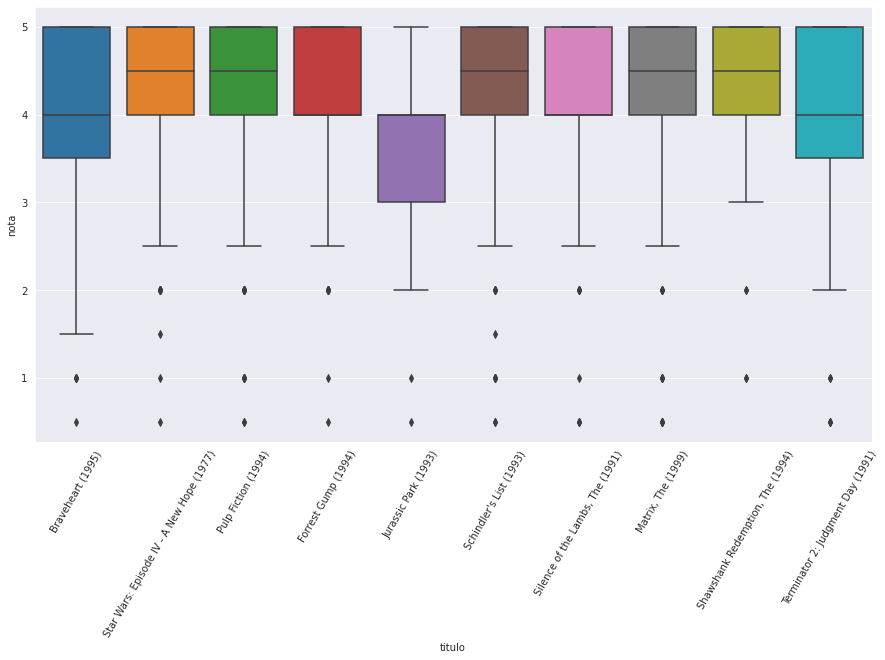

In [201]:
plt.rcParams['figure.figsize']=15,8
sns.boxplot(data = topVotadosComNome,
            x='titulo',
            y='nota', 
            orient='vertical'            
)
plt.xticks(rotation=60)
plt.show()

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes.

Para esse desafio utilizaremos dos métodos `mean`, `mode`, `median` do `pandas`, que correspondem a média, moda e mediana correspectivamente.

### Relembrando

Essas são medidas estatísticas da tendência central de um conjunto de dados.

- Média: soma dos valores pelo número de elementos.

- Moda: Valor que mais comum.

- Mediana: O elemento que divide a amostra ordenada no meio.

In [0]:
def get_central(filme_id, avaliacoes_filmes=avaliacoes):
  filme_buscado = avaliacoes_filmes.loc[avaliacoes_filmes.filmeId == filme_id]
  media = filme_buscado.nota.mean()
  moda = filme_buscado.nota.mode()[0]
  mediana = filme_buscado.nota.median()
  print(f'''
  Filme: {filme_id}
  Media: {media}
  Moda: {moda}
  Mediana: {mediana}
  ''')


In [217]:
get_central(1)


  Filme: 1
  Media: 3.9209302325581397
  Moda: 4.0
  Mediana: 4.0
  


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


Para esse Desafio irei utilizar o filme com maior número de votos:

- BraveHeart: `filme_id = 110`

Para completarmos esse desafiio temos que utilizar o método `subplot` da biblioteca `matplotlib`, que divide a figura em linhas e colunas, funcionando como indices para plotagem.

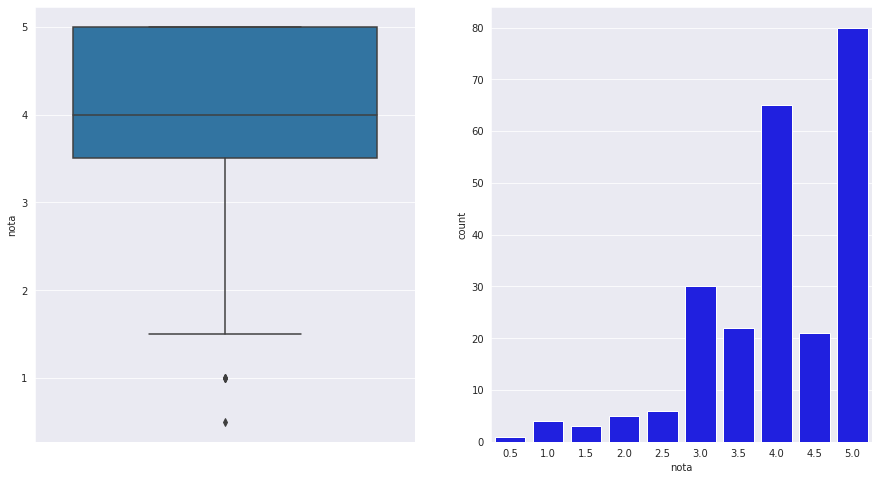

In [221]:
fig, ax =plt.subplots(1,2)
sns.boxplot(avaliacoesBraveHeart.nota, ax=ax[0], orient='vertical')
sns.countplot(avaliacoesBraveHeart.nota, ax=ax[1], color='b')
fig.show()

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

Para essa tarefa precisamos extrair o ano do filme - que se encontra entre parênteses dentro do titulo.

In [222]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Para isso utilizaremos um método chamado `extract`.

Esse método recebe como parâmetro uma Expressão Regular com um grupo, que será retirado da string.

Nesse caso, como queremos retirar um ano que contém 4 dígitos numéricos, utilizamos:

`'\w*\((\d{4})\)'`

- `\w*` = O número máximo de letras

- `\(` = (

- `\)` = )

- `\d{4}` = 4 números

- `()` = identifica o padrão a ser extraído

In [234]:
filmes['ano'] = filmes.titulo.str.extract('\w*\((\d{4})\)')
filmes.head()

,filmeId,titulo,generos,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


Após extraído o ano dos filmes faremos novamente o merge com o DataFrame de avaliações

In [235]:
avaliacoesComAno = filmes.merge(avaliacoes, on='filmeId', how='left')
avaliacoesComAno.head()

,filmeId,titulo,generos,ano,usuarioId,nota,momento
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17.0,4.5,1.305696e+09


Como queremos avaliar a média dos filmes de determinados anos não faz sentido mantermos valores inválidos de ano, por isso utilizaremos o dropna para removê-los

In [0]:
avaliacoesComAno[avaliacoesComAno.ano.isna()]

In [0]:
avaliacoesComAno.ano.dropna(inplace=True)

Por fim agruparemos os registros de avaliações por `'ano'` e calcularemos a média da `'nota'` do agrupamento. 

In [0]:
mediasPorAno = avaliacoesComAno.groupby('ano')['nota'].agg('mean')

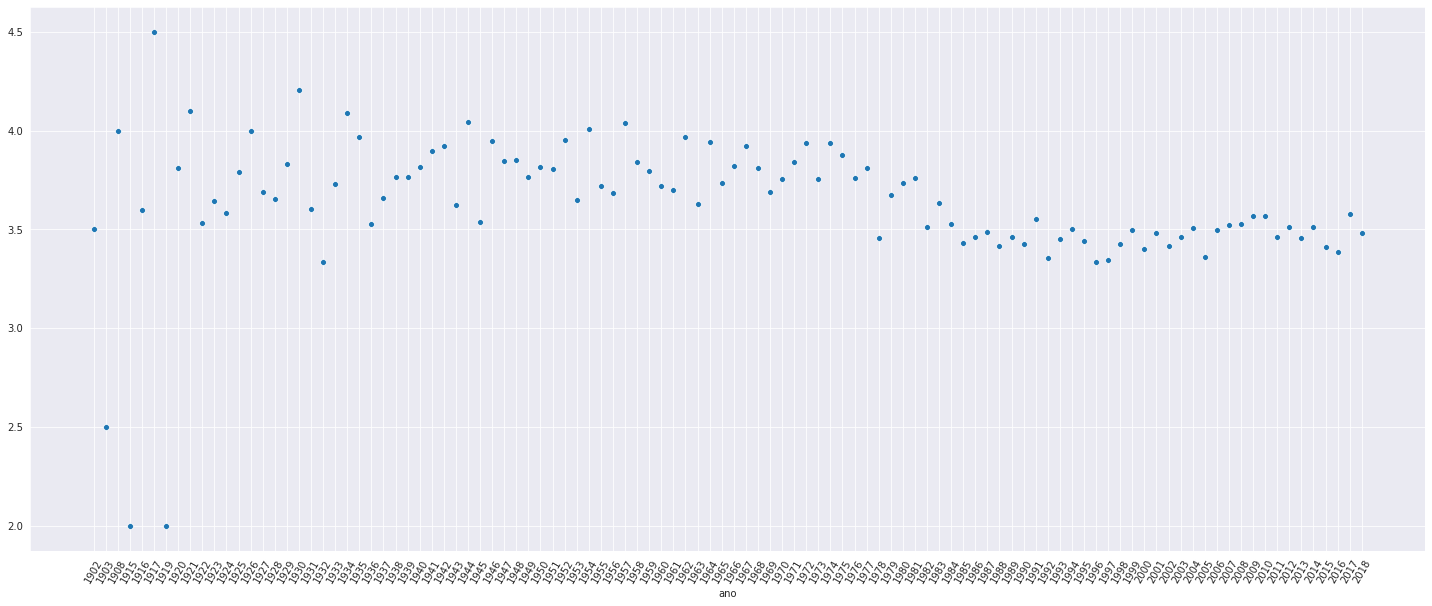

In [250]:
plt.rcParams['figure.figsize']=25,10
sns.scatterplot(x=mediasPorAno.index, y=mediasPorAno.values)
plt.xticks(rotation=60)
plt.show()